<a href="https://colab.research.google.com/github/ftkovr9k/NumberOfBikesLinearRegression/blob/main/Seol_Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Currently, rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.

Data set: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv")

In [83]:
columns = ["date", "bike_count", "hour", "temperature", "humidity", "wind_speed", "visibility", "dew_pt_temp", "solar_radiation", "rainfall", "snowfall", "seasons", "holiday", "functioning_day"]
df.columns = columns

In [84]:
df.drop(["date", "holiday", "seasons"], axis=1, inplace=True)
df.dropna(inplace=True)
#for col in columns:
#  if col == "Date" or col == "Seasons" or col == "Holiday" or col == "Functioning Day":
#    continue
#  df.fillna(np.mean(df[col]))

In [85]:
df["functioning_day"] = (df["functioning_day"] == "Yes").astype(int)

In [86]:
df.head()

,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_pt_temp,solar_radiation,rainfall,snowfall,functioning_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


Only looking at noon data

In [87]:
df = df[df["hour"]==12]
df.drop_duplicates(inplace=True)

<ipython-input-87-e0630c1223d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [88]:
df.head()

,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_pt_temp,solar_radiation,rainfall,snowfall,functioning_day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [89]:
df.shape

(365, 11)

Now that we have the noon records, drop the hour column

In [90]:
df.drop("hour", axis=1, inplace=True)

<ipython-input-90-b28c7035bb9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("hour", axis=1, inplace=True)


In [91]:
df.head()

,bike_count,temperature,humidity,wind_speed,visibility,dew_pt_temp,solar_radiation,rainfall,snowfall,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


Move the target column to the right

In [92]:
bike_col = df.pop("bike_count")
df.insert(df.shape[1], "bike_count", bike_col)
df.head()

,temperature,humidity,wind_speed,visibility,dew_pt_temp,solar_radiation,rainfall,snowfall,functioning_day,bike_count
12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1,449
36,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1,479
60,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1,333
84,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1,393
108,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1,321


Plot to see coorelation & eliminate some features

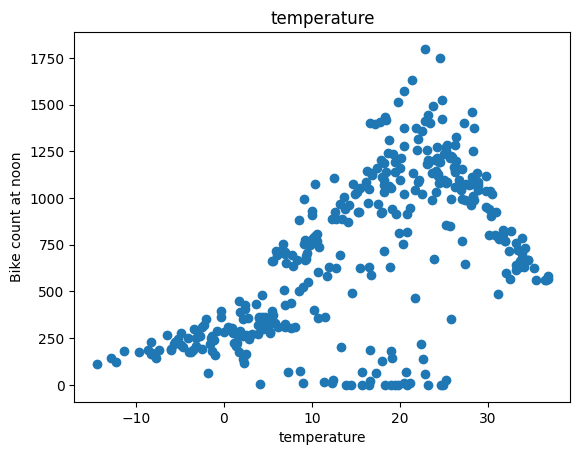

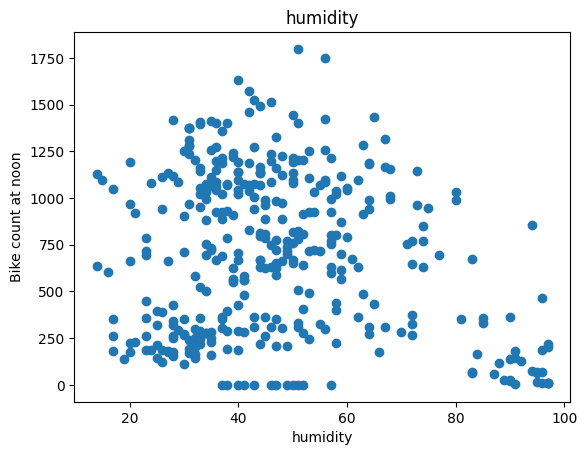

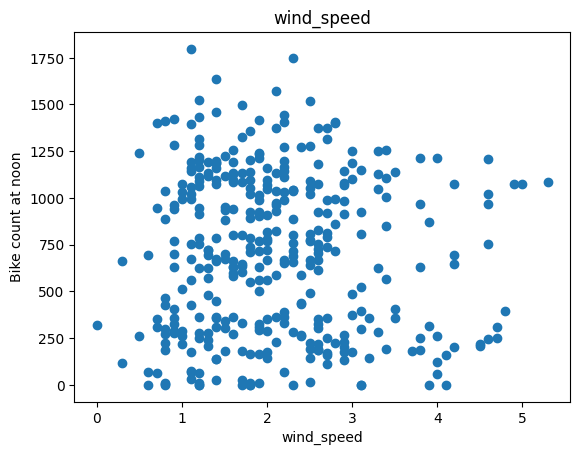

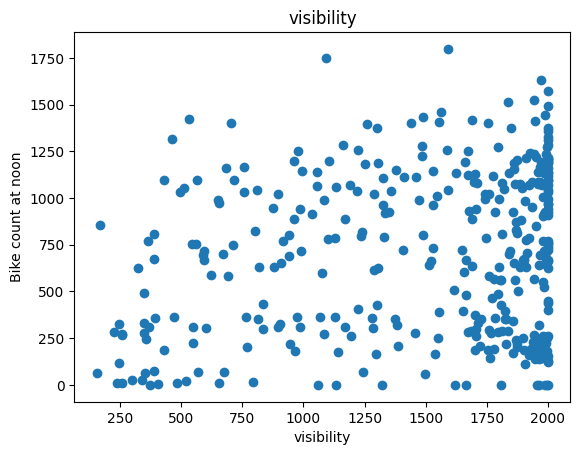

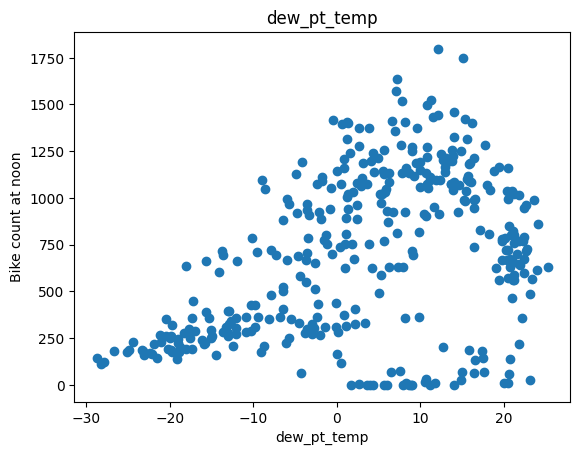

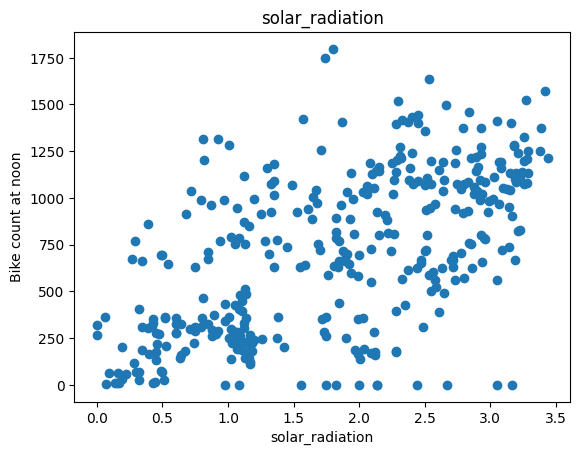

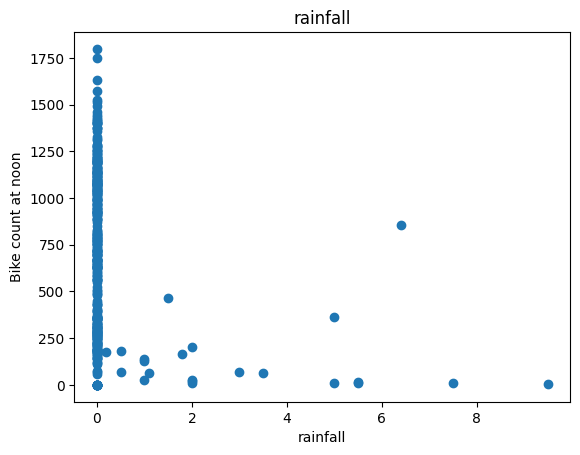

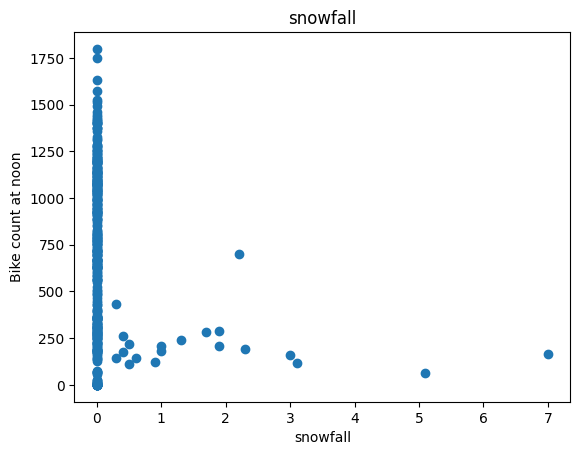

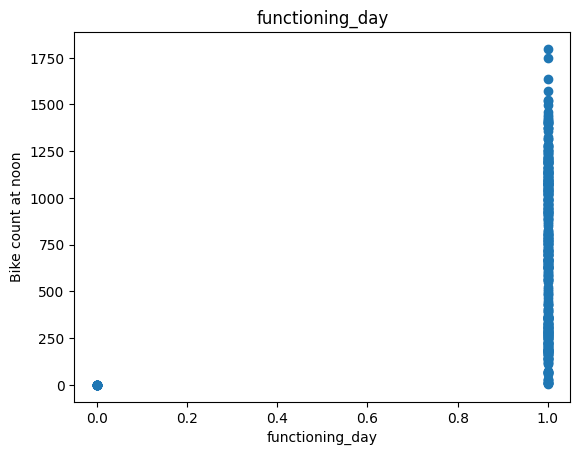

In [93]:
for col in df.columns:
  if col == "bike_count":
    continue
  plt.scatter(df[col], df["bike_count"])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Bike count at noon")
  plt.show()

Dropping wind_speed, visibility & functional columns

In [94]:
df.drop(["wind_speed", "visibility", "functioning_day"], axis=1, inplace=True)

In [95]:
df.head()

,temperature,humidity,dew_pt_temp,solar_radiation,rainfall,snowfall,bike_count
12,1.7,23,-17.2,1.11,0.0,0.0,449
36,4.3,41,-7.8,1.09,0.0,0.0,479
60,5.8,85,3.4,0.43,0.0,0.0,333
84,-0.3,38,-12.9,1.11,0.0,0.0,393
108,-2.3,25,-19.7,0.00,0.0,0.0,321


Split into Train, Valid, Test

In [96]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6* len(df)), int(0.8*len(df))])
print(train.shape)
print(valid.shape)
print(test.shape)

(219, 7)
(73, 7)
(73, 7)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [97]:
def get_xy(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  y = np.reshape(y, (-1, 1))

  data = np.hstack((X, y))
  return data, X, y

Extract X & y

In [98]:
data_train, X_train, y_train = get_xy(train)
data_valid, X_valid, y_valid = get_xy(valid)
data_test, X_test, y_test = get_xy(test)

In [99]:
lr_model = LinearRegression()

In [100]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = lr_model.predict(X_test)

In [102]:
lr_model.score(X_test, y_test)

0.40754751296510294

Using Neural Network

In [114]:
#Create Normalizer layer
normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=None)
normalizer.adapt(X_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])

In [116]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [117]:
history = nn_model.fit(X_train, y_train,
                       verbose=0,
                       epochs=1000,
                       validation_data= (X_valid, y_valid)
                       )

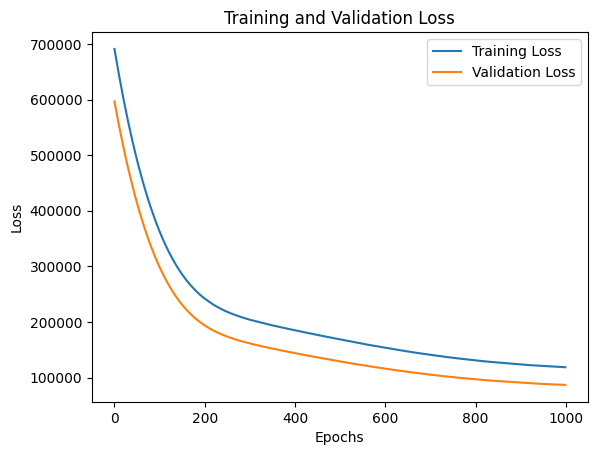

In [118]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()